In [37]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15, 15)

from scipy import stats
import numpy as np
from matplotlib import pyplot as plt

LOWER_P_BOUND = 0.01
UPPER_P_BOUND = 0.99

[name for name in dir(stats) if isinstance(getattr(stats, name), stats.rv_continuous)]

['alpha',
 'anglit',
 'arcsine',
 'beta',
 'betaprime',
 'bradford',
 'burr',
 'cauchy',
 'chi',
 'chi2',
 'cosine',
 'dgamma',
 'dweibull',
 'erlang',
 'expon',
 'exponnorm',
 'exponpow',
 'exponweib',
 'f',
 'fatiguelife',
 'fisk',
 'foldcauchy',
 'foldnorm',
 'frechet_l',
 'frechet_r',
 'gamma',
 'gausshyper',
 'genexpon',
 'genextreme',
 'gengamma',
 'genhalflogistic',
 'genlogistic',
 'gennorm',
 'genpareto',
 'gilbrat',
 'gompertz',
 'gumbel_l',
 'gumbel_r',
 'halfcauchy',
 'halfgennorm',
 'halflogistic',
 'halfnorm',
 'hypsecant',
 'invgamma',
 'invgauss',
 'invweibull',
 'johnsonsb',
 'johnsonsu',
 'ksone',
 'kstwobign',
 'laplace',
 'levy',
 'levy_l',
 'levy_stable',
 'loggamma',
 'logistic',
 'loglaplace',
 'lognorm',
 'lomax',
 'maxwell',
 'mielke',
 'nakagami',
 'ncf',
 'nct',
 'ncx2',
 'norm',
 'pareto',
 'pearson3',
 'powerlaw',
 'powerlognorm',
 'powernorm',
 'rayleigh',
 'rdist',
 'recipinvgauss',
 'reciprocal',
 'rice',
 'semicircular',
 't',
 'triang',
 'truncexpon',


In [47]:
def make_label(names, param_tuple):
    return '${}$'.format(', '.join('{}={}'.format(name, param) for name, param in zip(names, param_tuple)))

def make_plot(distribution, param_names, param_tuples):
    dists = []
    xmin = []
    xmax = []
    for param_tuple in param_tuples:
        dists.append(distribution(*param_tuple))
        xmin.append(dists[-1].ppf(LOWER_P_BOUND))
        xmax.append(dists[-1].ppf(UPPER_P_BOUND))
        
    x = np.linspace(min(xmin), max(xmax), 200)
    
    for dist, param_tuple in zip(dists, param_tuples):
        y = dist.pdf(x)
        plt.plot(x, y, label=make_label(param_names, param_tuple))

    plt.legend()
    plt.show()
    
partial_make_plot = lambda dst: make_plot(dst, param_names, params)

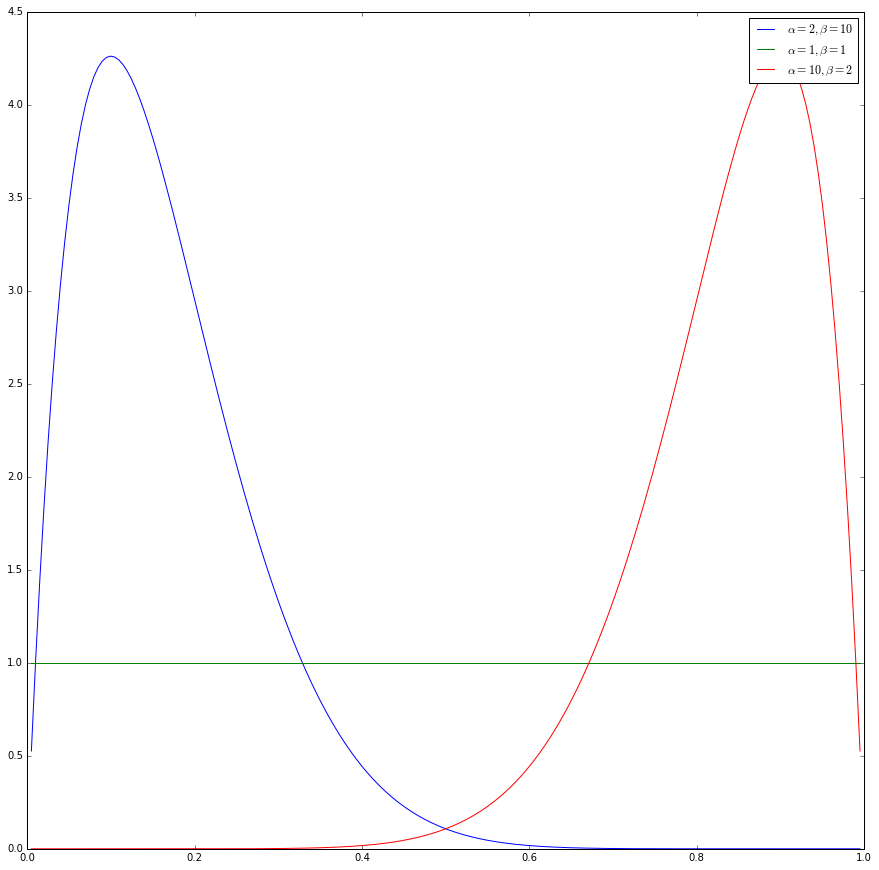

In [48]:
# beta

param_names = ['a', 'b']
params = [(2, 10), (1, 1), (10, 2)]

partial_make_plot(stats.beta)

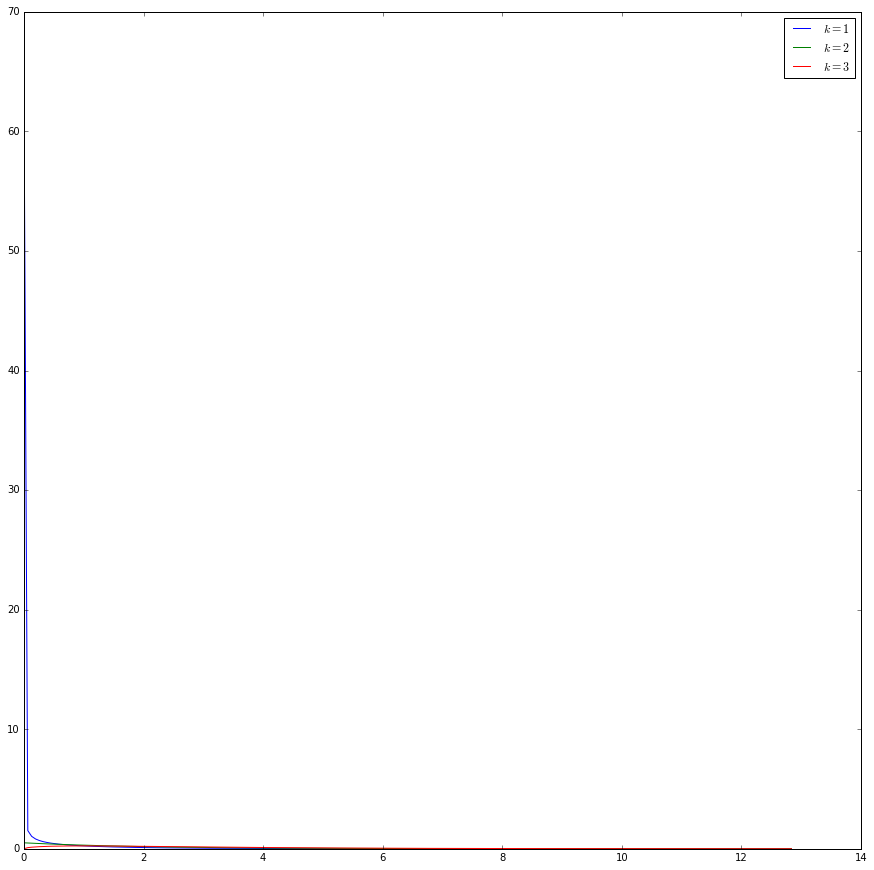

In [49]:
#chi^2

param_names = ['k']
params = [(1,), (2,), (3,)]

partial_make_plot(stats.chi2)

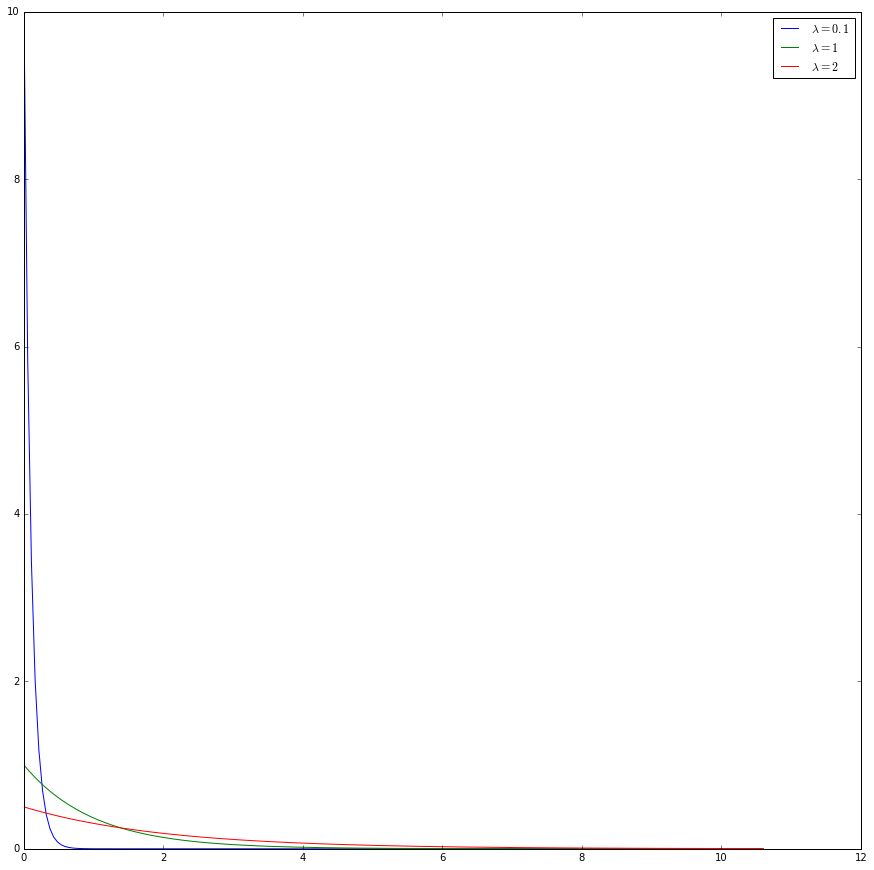

In [54]:
#exponential

param_names = ['\lambda']
params = [(0.1,), (1,), (2,)]

partial_expon = lambda *args: stats.expon(0, *args)  # set the location parameter to 0
partial_make_plot(partial_expon)

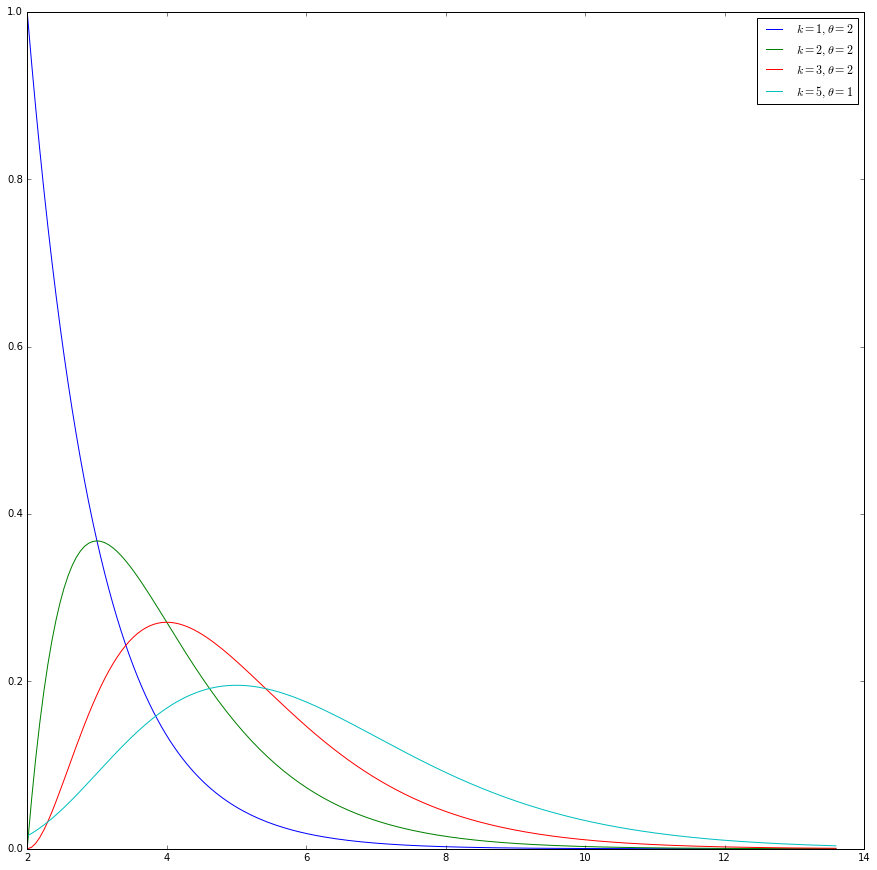

In [51]:
#gamma

param_names = ['k', r'\theta']
params = [(1,2), (2,2), (3,2), (5,1)]

partial_make_plot(stats.gamma)

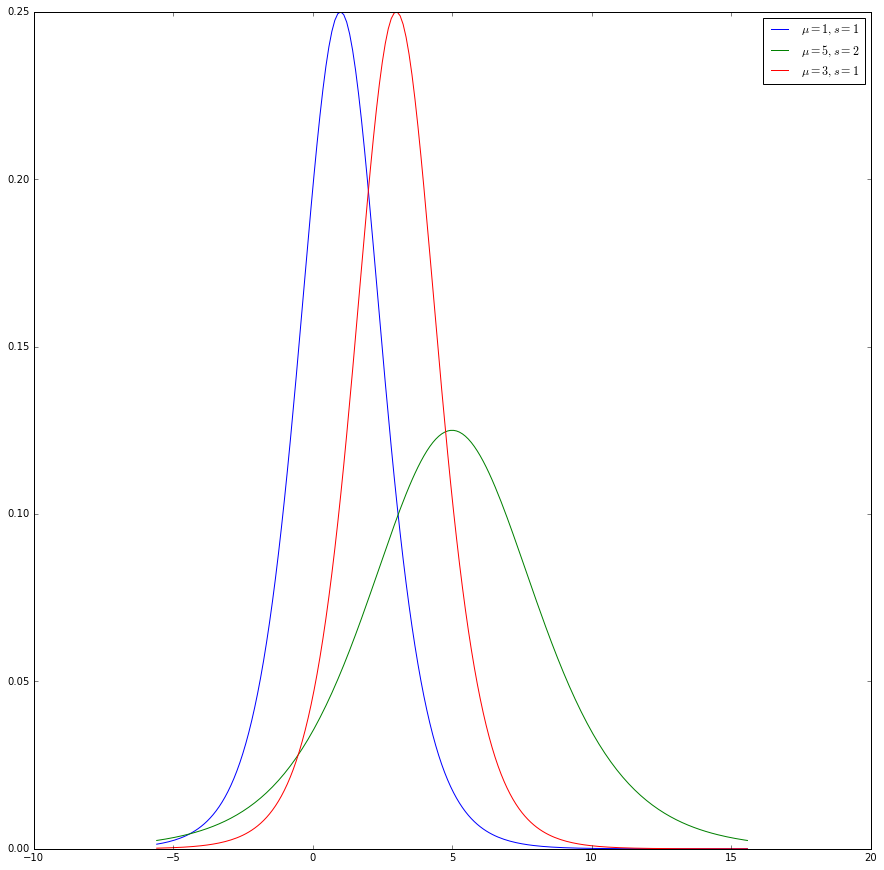

In [52]:
#logistic

param_names = [r'\mu', 's']
params = [(1,1), (5,2), (3,1)]

partial_make_plot(stats.logistic)

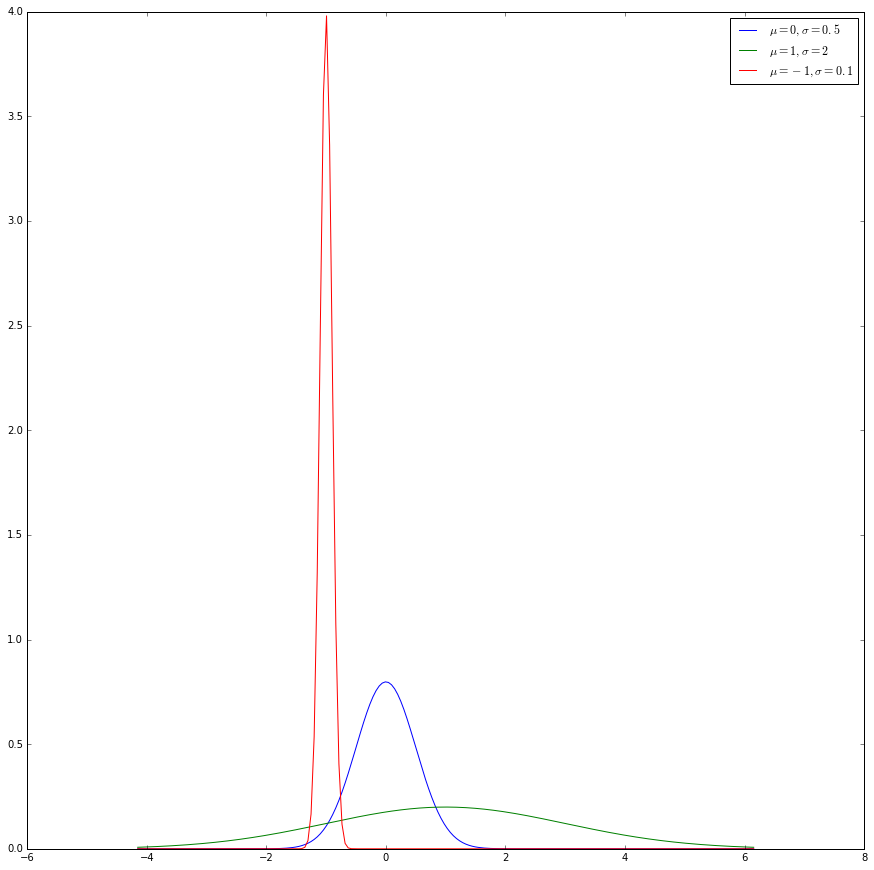

In [53]:
#norm

param_names = [r'\mu', r'\sigma']
params = [(0, 0.5), (1,2), (-1, 0.1)]

partial_make_plot(stats.norm)

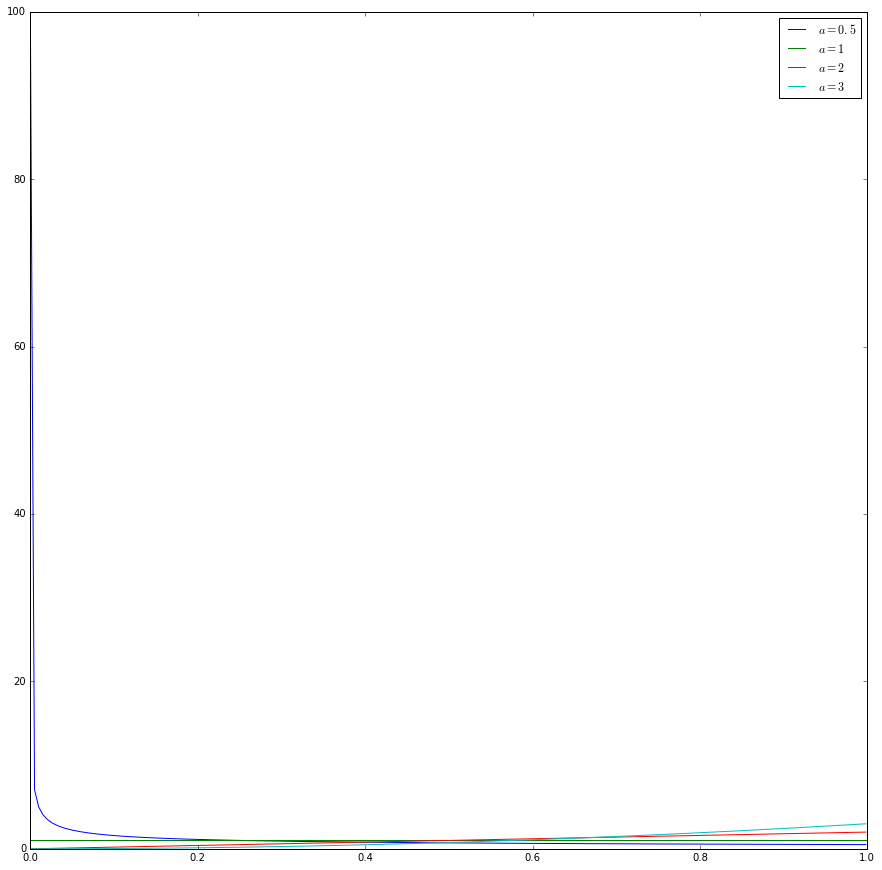

In [55]:
# power law
## special case of the beta distribution, with parameter b = 0

param_names = ['a']
params = [(0.5,), (1,), (2,), (3,)]

partial_make_plot(stats.powerlaw)